<a href="https://colab.research.google.com/github/HazrinR/Sentiment-Analysis-Financial-Market-Predictions/blob/main/Sentiment_Analysis_Financial_Market_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk scikit-learn pandas numpy matplotlib seaborn
!pip install transformers datasets
!pip install catboost

nltk.download('all')



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.0 MB/s eta 0:00:00


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from google.colab import drive
import pandas as pd


file_path = '/content/drive/MyDrive/data.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

df.head(10)

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
5,$SPY wouldn't be surprised to see a green close,positive
6,Shell's $70 Billion BG Deal Meets Shareholder ...,negative
7,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative
8,Kone 's net sales rose by some 14 % year-on-ye...,positive
9,The Stockmann department store will have a tot...,neutral


In [ ]:
df['Sentiment'].value_counts()

,count
Sentiment,
neutral,3130
positive,1852
negative,860


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [ ]:
df.describe()

,Sentence,Sentiment
count,5842,5842
unique,5322,3
top,Net sales decreased to EUR 220.5 mn from EUR 4...,neutral
freq,2,3130


In [ ]:
df.shape

(5842, 2)

uklanjanje duplikata i NaN vrijednosti (nema NaN vrijednosti samo eto za svaki slucaj) i onda df.info nakon toga

In [ ]:

df.drop_duplicates(subset=["Sentence"], inplace=True)
df.dropna(subset=["Sentence", "Sentiment"], inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5322 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5322 non-null   object
 1   Sentiment  5322 non-null   object
dtypes: object(2)
memory usage: 124.7+ KB


Preprocessing

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))

    tokens = word_tokenize(text)

    tokens = [word for word in tokens if word not in stop_words and len(word) > 1]

    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

df['Cleaned_Sentence'] = df['Sentence'].apply(preprocess_text)
df[['Sentence', 'Cleaned_Sentence']].head(10)




,Sentence,Cleaned_Sentence
0,The GeoSolutions technology will leverage Bene...,geosolutions technology leverage benefon gps s...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",esi low bk real possibility
2,"For the last quarter of 2010 , Componenta 's n...",last quarter componenta net sale doubled eurm ...
3,According to the Finnish-Russian Chamber of Co...,according finnishrussian chamber commerce majo...
4,The Swedish buyout firm has sold its remaining...,swedish buyout firm sold remaining percent sta...
5,$SPY wouldn't be surprised to see a green close,spy wouldnt surprised see green close
6,Shell's $70 Billion BG Deal Meets Shareholder ...,shell billion bg deal meet shareholder skepticism
7,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,ssh communication security corp stock exchange...
8,Kone 's net sales rose by some 14 % year-on-ye...,kone net sale rose yearonyear first nine month
9,The Stockmann department store will have a tot...,stockmann department store total floor space s...


Class Distribution:
Sentiment
neutral     2878
positive    1852
negative     592
Name: count, dtype: int64


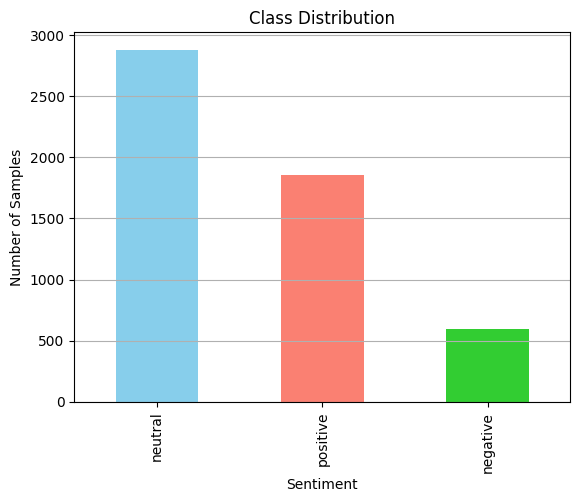

In [ ]:
import matplotlib.pyplot as plt

print("Class Distribution:")
print(df['Sentiment'].value_counts())
df['Sentiment'].value_counts().plot(kind='bar', title="Class Distribution", color=["skyblue", "salmon", "limegreen"])
plt.xlabel("Sentiment")
plt.ylabel("Number of Samples")
plt.grid(axis='y')
plt.show()


Text Length Statistics:
count    5322.000000
mean       80.453589
std        41.902597
min         0.000000
25%        49.000000
50%        71.000000
75%       103.750000
max       243.000000
Name: text_length, dtype: float64


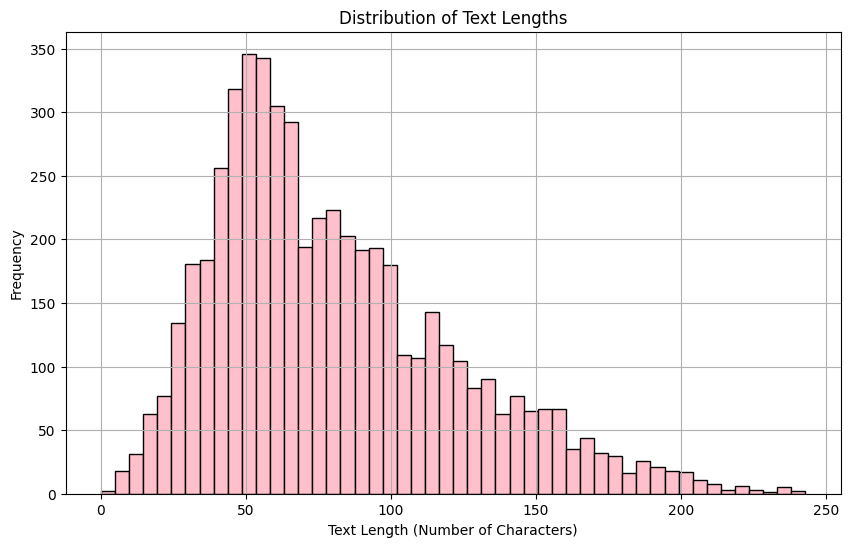

In [ ]:
# Calculate text length for cleaned sentences
df['text_length'] = df['Cleaned_Sentence'].apply(len)

# Print text length statistics
print("Text Length Statistics:")
print(df['text_length'].describe())

# Visualize text length distribution
plt.figure(figsize=(10,6))
df['text_length'].hist(bins=50, color='pink', edgecolor='black')
plt.title("Distribution of Text Lengths")
plt.xlabel("Text Length (Number of Characters)")
plt.ylabel("Frequency")
plt.show()



Word Count Statistics:
count    5322.000000
mean       11.134348
std         5.427885
min         0.000000
25%         7.000000
50%        10.000000
75%        14.000000
max        36.000000
Name: word_count, dtype: float64


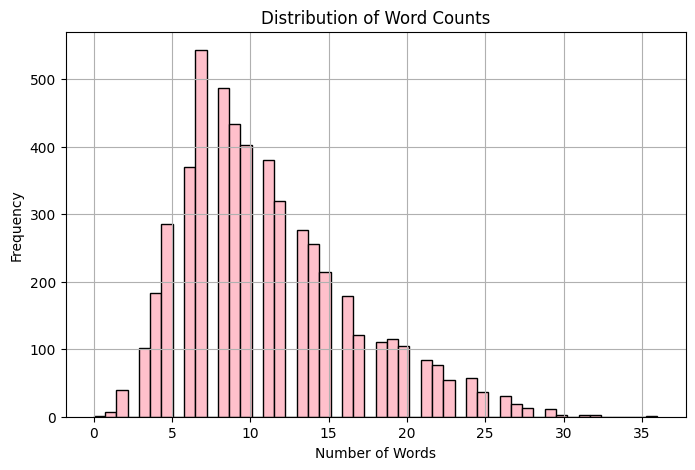

In [ ]:
df['word_count'] = df['Cleaned_Sentence'].apply(lambda x: len(x.split()))
print("\nWord Count Statistics:")
print(df['word_count'].describe())

plt.figure(figsize=(8,5))
plt.hist(df['word_count'], bins=50, color='pink', edgecolor='black')
plt.title("Distribution of Word Counts")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

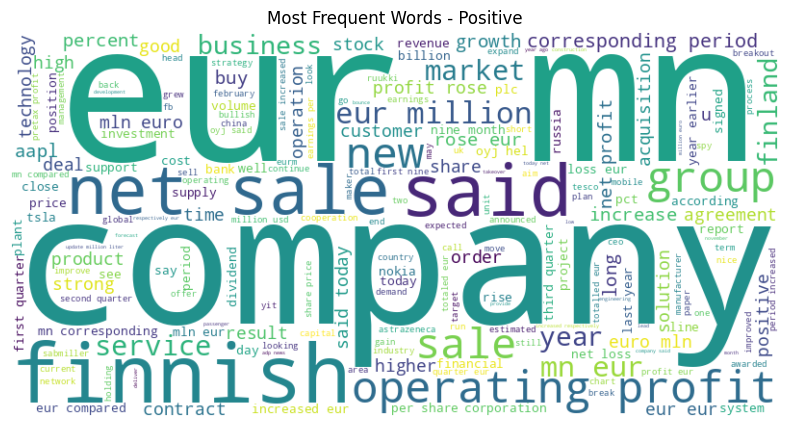

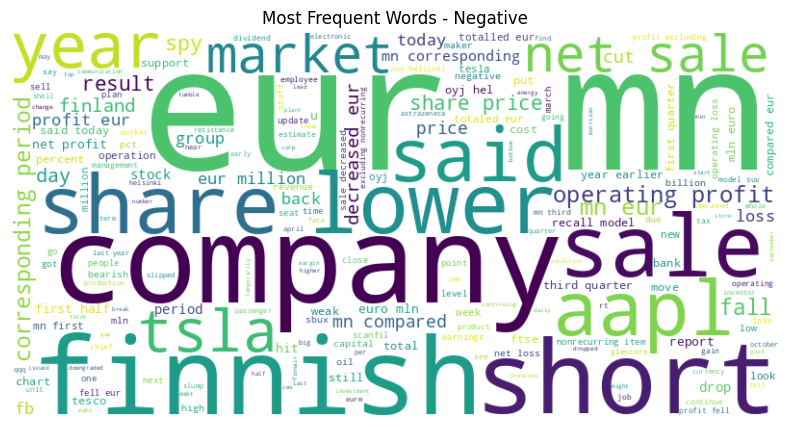

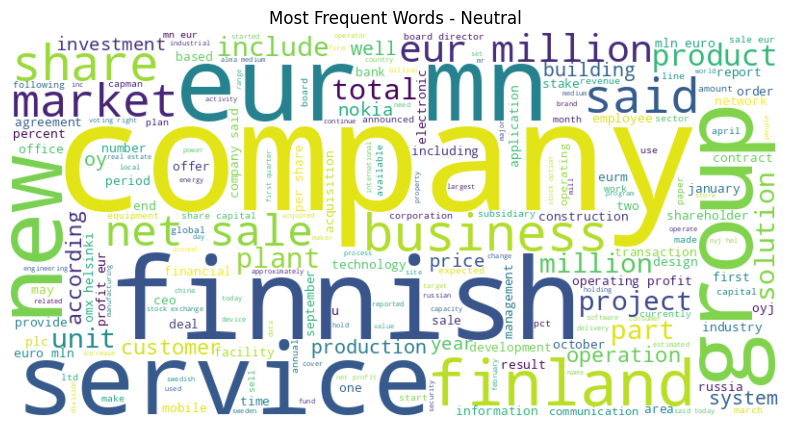

In [ ]:
from collections import Counter
from wordcloud import WordCloud

def plot_wordcloud_by_sentiment(sentiment_label):
    words = ' '.join(df[df['Sentiment'] == sentiment_label]['Cleaned_Sentence'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Most Frequent Words - {sentiment_label.capitalize()}')
    plt.show()

plot_wordcloud_by_sentiment('positive')
plot_wordcloud_by_sentiment('negative')
plot_wordcloud_by_sentiment('neutral')


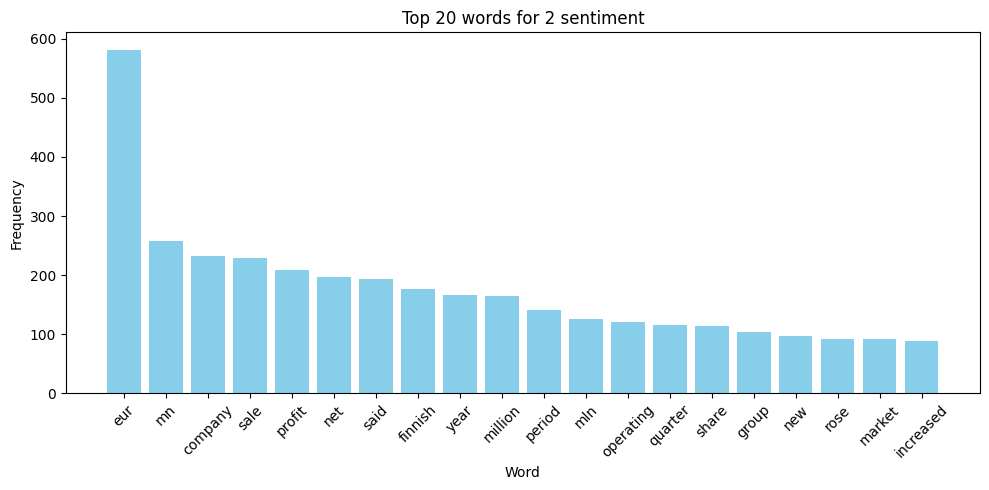

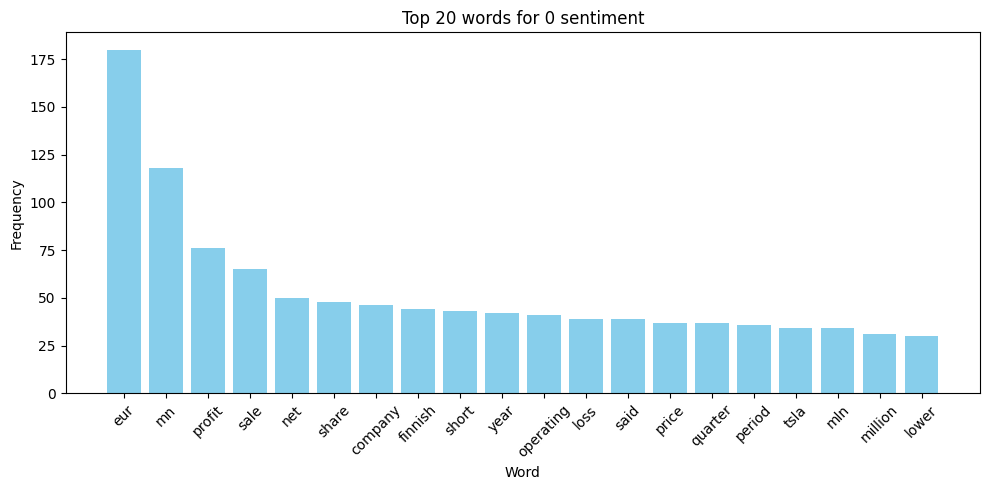

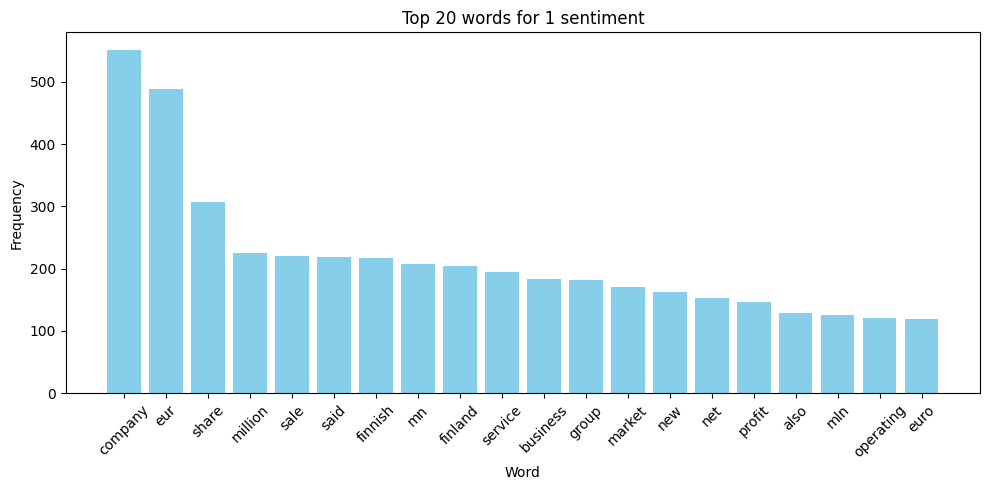

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

def get_top_n_words(sentences, n=20):
    words = ' '.join(sentences).split()
    return Counter(words).most_common(n)

# Dodajemo listu sentimenta
sentiments = df['Sentiment'].unique()

for sentiment in sentiments:
    top_words = get_top_n_words(df[df['Sentiment'] == sentiment]['Cleaned_Sentence'], n=20)
    words, counts = zip(*top_words)

    plt.figure(figsize=(10, 5))
    plt.bar(words, counts, color='skyblue')
    plt.xticks(rotation=45)
    plt.title(f'Top 20 words for {sentiment} sentiment')
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()



In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Sentiment'] = encoder.fit_transform(df['Sentiment'])
df.head()

,Sentence,Sentiment,Cleaned_Sentence
0,The GeoSolutions technology will leverage Bene...,2,geosolutions technology leverage benefon gps s...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",0,esi low bk real possibility
2,"For the last quarter of 2010 , Componenta 's n...",2,last quarter componenta net sale doubled eurm ...
3,According to the Finnish-Russian Chamber of Co...,1,according finnishrussian chamber commerce majo...
4,The Swedish buyout firm has sold its remaining...,1,swedish buyout firm sold remaining percent sta...


TF-IDF and Data Splitting

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

tfidf_vectorizer = TfidfVectorizer(max_features=5000)

X = tfidf_vectorizer.fit_transform(df['Cleaned_Sentence'])

y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)


before SMOTE

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'Multinomial NB': MultinomialNB(),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(logging_level='Silent')
}

param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    'Multinomial NB': {
        'alpha': [0.1, 0.5, 1.0, 2.0]
    },
    'XGBoost': {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0]
    },
    'LightGBM': {
        'n_estimators': [100, 200, 300],
        'max_depth': [-1, 10, 20],
        'learning_rate': [0.01, 0.1, 0.2],
        'num_leaves': [31, 50, 100]
    },
    'CatBoost': {
        'iterations': [100, 200, 300],
        'depth': [3, 6, 10],
        'learning_rate': [0.01, 0.1, 0.2]
    }
}

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
for name, model in models.items():
    model.fit(X_train_bal, y_train_bal)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"\n--- {name} Results ---")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(report)


--- Logistic Regression Results ---
Accuracy: 0.7305164319248826
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.53      0.51       118
           1       0.80      0.80      0.80       576
           2       0.71      0.69      0.70       371

    accuracy                           0.73      1065
   macro avg       0.67      0.67      0.67      1065
weighted avg       0.73      0.73      0.73      1065


--- SVM Results ---
Accuracy: 0.7276995305164319
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.19      0.27       118
           1       0.73      0.90      0.81       576
           2       0.75      0.63      0.68       371

    accuracy                           0.73      1065
   macro avg       0.66      0.57      0.59      1065
weighted avg       0.71      0.73      0.71      1065


--- Random Forest Results ---
Accuracy: 0.7192488262910798
Classification R

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



--- LightGBM Results ---
Accuracy: 0.7305164319248826
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.42      0.45       118
           1       0.77      0.84      0.80       576
           2       0.73      0.66      0.70       371

    accuracy                           0.73      1065
   macro avg       0.66      0.64      0.65      1065
weighted avg       0.72      0.73      0.73      1065


--- CatBoost Results ---
Accuracy: 0.7389671361502348
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.46      0.48       118
           1       0.76      0.85      0.80       576
           2       0.77      0.66      0.71       371

    accuracy                           0.74      1065
   macro avg       0.68      0.66      0.66      1065
weighted avg       0.74      0.74      0.74      1065


--- Multinomial NB Results ---
Accuracy: 0.7023474178403756
Classification Report

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [16:35:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- XGBoost Results ---
Accuracy: 0.7361502347417841
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.36      0.43       118
           1       0.75      0.87      0.81       576
           2       0.76      0.64      0.70       371

    accuracy                           0.74      1065
   macro avg       0.68      0.63      0.64      1065
weighted avg       0.73      0.74      0.73      1065



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight="balanced"),
    "SVM": SVC(class_weight="balanced"),
    "Random Forest": RandomForestClassifier(class_weight="balanced"),
    "Gradient Boosting": GradientBoostingClassifier(),
    "LightGBM": LGBMClassifier(class_weight="balanced"),
    "CatBoost": CatBoostClassifier(verbose=0, auto_class_weights="Balanced"),
    "Multinomial NB": MultinomialNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", scale_pos_weight=1)
}


for name, model in models.items():
    model.fit(X_train_bal, y_train_bal)
    y_pred = model.predict(X_test)
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred))




=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.50      0.53      0.51       118
           1       0.80      0.80      0.80       576
           2       0.71      0.69      0.70       371

    accuracy                           0.73      1065
   macro avg       0.67      0.67      0.67      1065
weighted avg       0.73      0.73      0.73      1065


=== SVM ===
              precision    recall  f1-score   support

           0       0.51      0.19      0.27       118
           1       0.73      0.90      0.81       576
           2       0.75      0.63      0.68       371

    accuracy                           0.73      1065
   macro avg       0.66      0.57      0.59      1065
weighted avg       0.71      0.73      0.71      1065


=== Random Forest ===
              precision    recall  f1-score   support

           0       0.44      0.33      0.38       118
           1       0.74      0.87      0.80       576
          

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



=== LightGBM ===
              precision    recall  f1-score   support

           0       0.49      0.42      0.45       118
           1       0.77      0.84      0.80       576
           2       0.73      0.66      0.70       371

    accuracy                           0.73      1065
   macro avg       0.66      0.64      0.65      1065
weighted avg       0.72      0.73      0.73      1065


=== CatBoost ===
              precision    recall  f1-score   support

           0       0.50      0.46      0.48       118
           1       0.76      0.85      0.80       576
           2       0.77      0.66      0.71       371

    accuracy                           0.74      1065
   macro avg       0.68      0.66      0.66      1065
weighted avg       0.74      0.74      0.74      1065


=== Multinomial NB ===
              precision    recall  f1-score   support

           0       0.38      0.64      0.48       118
           1       0.83      0.75      0.79       576
           2   

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [16:22:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== XGBoost ===
              precision    recall  f1-score   support

           0       0.51      0.36      0.43       118
           1       0.75      0.87      0.81       576
           2       0.76      0.64      0.70       371

    accuracy                           0.74      1065
   macro avg       0.68      0.63      0.64      1065
weighted avg       0.73      0.74      0.73      1065



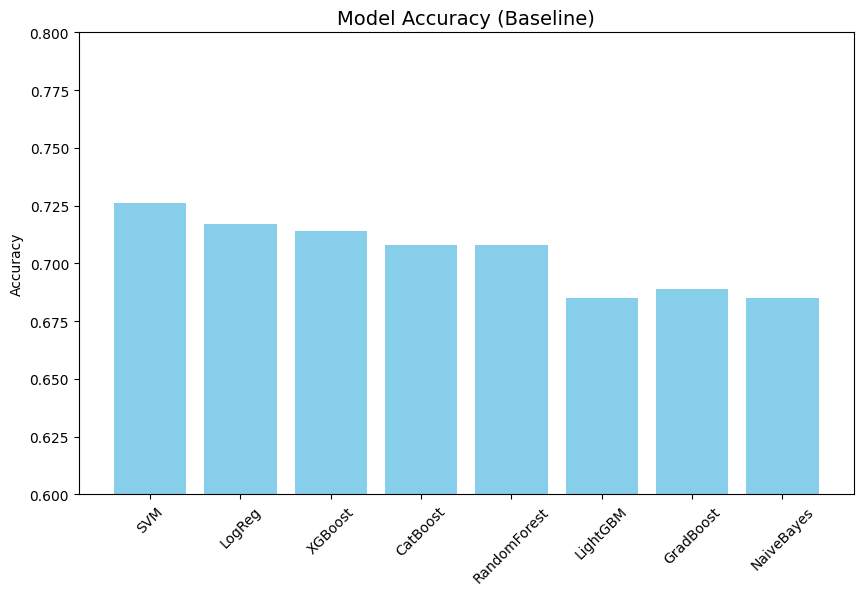

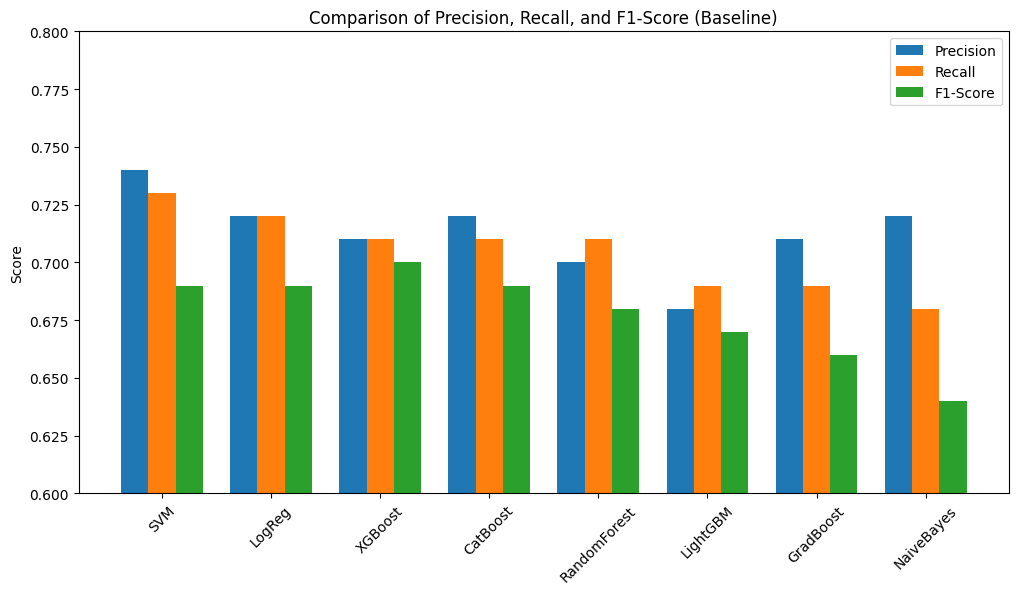

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Results
models = ["SVM", "LogReg", "XGBoost", "CatBoost", "RandomForest", "LightGBM", "GradBoost", "NaiveBayes"]
accuracy = [0.726, 0.717, 0.714, 0.708, 0.708, 0.685, 0.689, 0.685]
precision = [0.74, 0.72, 0.71, 0.72, 0.70, 0.68, 0.71, 0.72]
recall = [0.73, 0.72, 0.71, 0.71, 0.71, 0.69, 0.69, 0.68]
f1 = [0.69, 0.69, 0.70, 0.69, 0.68, 0.67, 0.66, 0.64]

# --- Chart 1: Accuracy ---
plt.figure(figsize=(10,6))
plt.bar(models, accuracy, color="skyblue")
plt.title("Model Accuracy (Baseline)", fontsize=14)
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.ylim(0.6, 0.8)
plt.show()

# --- Chart 2: Precision, Recall, F1 ---
x = np.arange(len(models))
width = 0.25

plt.figure(figsize=(12,6))
plt.bar(x - width, precision, width, label="Precision")
plt.bar(x, recall, width, label="Recall")
plt.bar(x + width, f1, width, label="F1-Score")

plt.xticks(x, models, rotation=45)
plt.ylabel("Score")
plt.title("Comparison of Precision, Recall, and F1-Score (Baseline)")
plt.legend()
plt.ylim(0.6, 0.8)
plt.show()


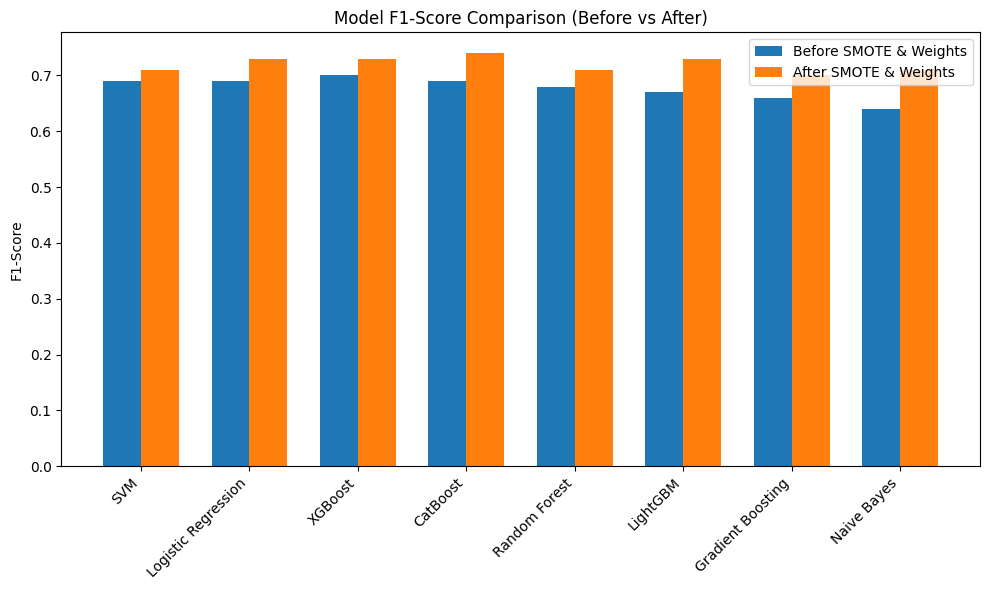

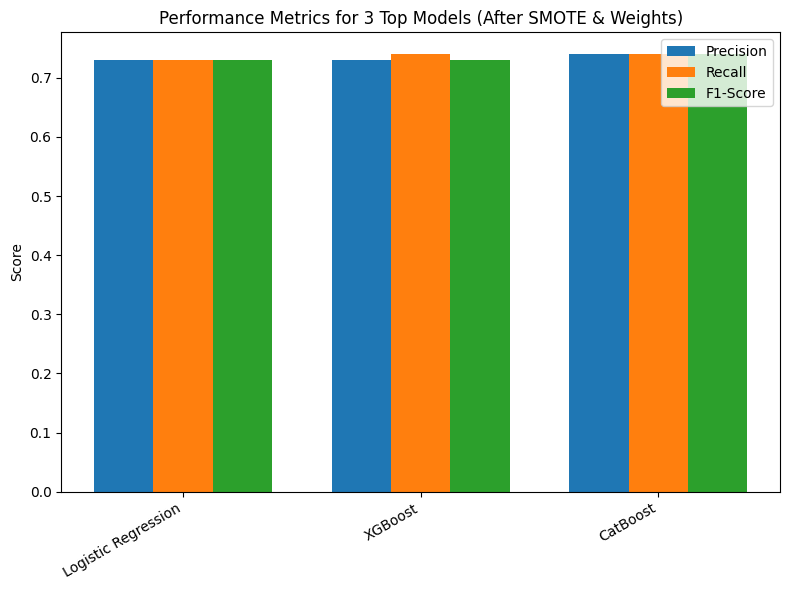

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Rezultati prije (5.1)
models = [
    "SVM", "Logistic Regression", "XGBoost", "CatBoost",
    "Random Forest", "LightGBM", "Gradient Boosting", "Naive Bayes"
]
f1_before = [0.69, 0.69, 0.70, 0.69, 0.68, 0.67, 0.66, 0.64]

# Rezultati poslije (5.2)
f1_after = [0.71, 0.73, 0.73, 0.74, 0.71, 0.73, 0.70, 0.71]
precision_after = [0.71, 0.73, 0.73, 0.74, 0.71, 0.72, 0.71, 0.73]
recall_after = [0.73, 0.73, 0.74, 0.74, 0.72, 0.73, 0.71, 0.70]

# -------------------------------
# 1) Bar chart: F1-score before vs after
# -------------------------------
x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, f1_before, width, label="Before SMOTE & Weights")
plt.bar(x + width/2, f1_after, width, label="After SMOTE & Weights")

plt.xticks(x, models, rotation=45, ha="right")
plt.ylabel("F1-Score")
plt.title("Model F1-Score Comparison (Before vs After)")
plt.legend()
plt.tight_layout()
plt.show()

# -------------------------------
# 2) Grouped bar chart: Precision, Recall, F1 (Top 3 models after)
# -------------------------------
top_models = ["Logistic Regression", "XGBoost", "CatBoost"]
precision_top = [0.73, 0.73, 0.74]
recall_top = [0.73, 0.74, 0.74]
f1_top = [0.73, 0.73, 0.74]

x = np.arange(len(top_models))
width = 0.25

plt.figure(figsize=(8,6))
plt.bar(x - width, precision_top, width, label="Precision")
plt.bar(x, recall_top, width, label="Recall")
plt.bar(x + width, f1_top, width, label="F1-Score")

plt.xticks(x, top_models, rotation=30, ha="right")
plt.ylabel("Score")
plt.title("Performance Metrics for 3 Top Models (After SMOTE & Weights)")
plt.legend()
plt.tight_layout()
plt.show()
